## Topic: Three Types of Obesity Related Hospital Admissions (England) 
---

### Description of world obesity trends :
According to the studies conducted by Global Burden of Disease (2017), the number of people affected by obesity has doubled since 1980 in 73 countries and women are more likely to be obese than men across all age groups. Besides, although the childhood obesity rates are lower than the adults, the rates have increased over the years. <br/>
Obesity is a serious issue since it might lead to several non-communicable diseases, such as heart disease, stroke, cancer, chronic respiratory diseases and diabetes which are the leading cause of mortality in the world. A research conducted by WTO shows that at least 2.8 million people die of being overweight or obese each year. This suggests that obesity is truely a global issue and governments should tackle it immediately, or we may be facing a wave of obesity in the coming years.

### Objectives of this project:
In this project, I used the numbers of obesity related admissions as an indicator to evaluate the severity/prevalence of obesity in England. I observed the the trend of obesity related admissions in England from 2002-2015 from different perspectives:
* Discovered the trend of three types of obesity admissions[^1] in England over the years (2002/03-2015/16) for all populations and younger population (aged below 16)
* Compared three types of obesity admissions between different genders and age groups (England)
* Compared the numbers of obesity related admissions by region (England)

[^1]: Three types of obesity admissions listed below.  <br/>
1.Finished Admission Episodes with a primary diagnosis of Obesity (FAE_Primary_Obesity) <br/>
2.Finished Admission Episodes with a primary or secondary diagnosis of obesity (FAE_PrimarySecondary_Obesity) <br/>
3.Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of Bariatric Surgery (FCE_PrimarySecondary_Obesity_Bariatric)

### Data Descriptions:

1. Datasets  <br><br>
In this project, I use two datasets obtained from [National Health Service](https://digital.nhs.uk/catalogue/PUB23742) (NHS).
    * Datasets 1: Time series data (contains obesity related admissions from 2002/03-2015/16)
    * Datasets 2: Clinical Commissioning Groups (CCG) data (contains only 2015/16 data)
    <br><br>
2. Variables

|<center> Definition of| variables used in the datasets|
|:------------|:-------------------------------------------------------------------------------------------| 
| <center>   Year     | Financial year within which the episode finished|
| <center>   ONS_Code  | ONS nine-character geographic code|
| <center>  Org_Code  | ODS organisational code|
| <center>  Org_Name   | ODS organisational name|
| <center>  Org_Type   | ODS organisational type|
| <center>Classification|Measure by which the metrics can be broken down by: <br/><br/> FAE_Primary_Obesity – Finished Admission Episodes with a primary diagnosis of Obesity <br/> (Admissions directly attributed to obesity) <br/><br/> FAE_PrimarySecondary_Obesity - Finished Admission Episodes with a primary or secondary diagnosis of obesity  <br/> (Admissions where obesity was a factor) <br/><br/> FCE_PrimarySecondary_Obesity_Bariatric - Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery' <br/> (Obesity related bariatric surgery)|
| <center> Metric_Primary|Demographic by which the data is presented (gender or age group)|
| <center>Metric_Secondary|Demographic breakdown|
| <center>Value|Number of admissions for each Classification/Metric|
* Note: 
    1. Org_Type. Org_Name, Org_Code are different between two datasets
    2. CGG datasets have missing values

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
## read library ##

import pandas as pd
import numpy as np
import os

## read data ##

path="/Users/chloe/Desktop/ST445_Project"
#path='/Users/lin/Desktop/ST445_Project' # another laptop
os.chdir(path)
df1 = pd.read_csv('Time_series_data_1516.csv', sep=',') # Time Series Dataset
df2 = pd.read_csv('CCG_data_1516.csv', sep=',') # CCG: Clinical Commissioning Groups
all = [df1, df2]

In [3]:
## check dimension and missing value ##

for df in all:
    print(df.shape)
for df in all:
    print(df.isnull().sum())
    
## drop extra columns in df1 ##
df1.drop(df1.columns[[8,9,10,11,12,13,14,15]], axis=1, inplace=True)

(462, 16)
(2043, 8)
Year                  0
ONS_Code              0
Org_Code              0
Org_Name              0
Classification        0
Metric_Primary        0
Metric_Secondary      0
Value                 0
Unnamed: 8          462
Unnamed: 9          462
Unnamed: 10         462
Unnamed: 11         462
Unnamed: 12         462
Unnamed: 13         462
Unnamed: 14         462
Unnamed: 15         462
dtype: int64
Year              0
Org_Type          0
ONS_Code          0
Org_Code          9
Org_Name          0
Classification    0
Metric_Primary    0
Value             0
dtype: int64


### Outline of how I process Dataset 1:
---

1. Sum value by 'Year' & 'Clssification' when Metric_Primary==AgeGroup to create the variable **'Count'** <br/>
-> the result (**Count**) should be the same as the value when Metric_Primary==Gender & Metric_Secondary==All persons; however, it seems that our results-Count are slightly different from the given data from NHS 
<br/><br/>

2. Pivot data to plot the trend of three types of obesity admissions from 2002/03-2015/16 for all populations (all age groups) and for child/young people (Ages under 16) <br/>
-> Discover the trend of three types of obesity admissions in England over the years (2002/03-2015/16) for all populations and for young people
<br/><br/>

3. Plot pie charts of different genders for three types of obesity admission (Average Value over the years) <br/>
-> Compared three types of obesity admissions between different genders 
<br/><br/>

4. Plot the bar chart of different age groups for three different classes (Average over the years) <br/>
-> Compared three types of obesity admissions between different age groups

In [4]:
## sort the time series data and reset index because sort will change the order##

df1 = df1.sort_index(by=['Year','Classification','Metric_Primary']).reset_index(drop=True)
df1.head(11)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Year   ONS_Code Org_Code Org_Name                Classification  \
0   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
1   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
2   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
3   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
4   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
5   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
6   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
7   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
8   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
9   2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
10  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   

   Metric_Primary Metric_Secondary  Value  
0        AgeGroup            16-24    912  
1        AgeGroup            25-34   2288  
2        AgeGroup            35-44   4371  
3        AgeGroup            45-54   5661  
4        AgeGroup            55-64   6721  
5        AgeGroup            65-74   5391  
6        AgeGroup              75+   2738  
7        AgeGroup         Under 16   1117  
8          Gender      All persons  29237  
9          Gender             Male  12068  
10         Gender           Female  17168

In [5]:
## 1: Sum value by 'Year' & 'Clssification' when Metric_Primary==AgeGroup to creat variable "Count" ##

df1_s = df1[df1.Metric_Primary=='AgeGroup'].groupby(['Year', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count'}).reset_index()
df1 = pd.merge(df1, df1_s, how='left', on=['Year', 'Classification']) # merge count to df1
df1[df1.Metric_Secondary=='All persons'].head(5) # difference b/w the given data from NHS (Value) and count


Year   ONS_Code Org_Code Org_Name  \
8   2002/03  E92000001      ENG  England   
19  2002/03  E92000001      ENG  England   
30  2002/03  E92000001      ENG  England   
41  2003/04  E92000001      ENG  England   
52  2003/04  E92000001      ENG  England   

                            Classification Metric_Primary Metric_Secondary  \
8             FAE_PrimarySecondary_Obesity         Gender      All persons   
19                     FAE_Primary_Obesity         Gender      All persons   
30  FCE_PrimarySecondary_Obesity_Bariatric         Gender      All persons   
41            FAE_PrimarySecondary_Obesity         Gender      All persons   
52                     FAE_Primary_Obesity         Gender      All persons   

    Value  Count  
8   29237  29199  
19   1275   1275  
30    345    345  
41  33546  33524  
52   1711   1711

In [6]:
## 2: Pivot df1_s ##
df1_sp = df1_s.pivot(index='Classification', columns='Year', values='Count')
df1_sp

Year                                    2002/03  2003/04  2004/05  2005/06  \
Classification                                                               
FAE_PrimarySecondary_Obesity              29199    33524    40724    51997   
FAE_Primary_Obesity                        1275     1711     2034     2561   
FCE_PrimarySecondary_Obesity_Bariatric      345      474      743     1035   

Year                                    2006/07  2007/08  2008/09  2009/10  \
Classification                                                               
FAE_PrimarySecondary_Obesity              67163    80772   102834   142061   
FAE_Primary_Obesity                        3862     5014     7985    10569   
FCE_PrimarySecondary_Obesity_Bariatric     1951     2722     4219     7213   

Year                                    2010/11  2011/12  2012/13  2013/14  \
Classification                                                               
FAE_PrimarySecondary_Obesity             211499   266659   292396   365568   
FAE_Primary_Obesity                       11566    11736    10957     9325   
FCE_PrimarySecondary_Obesity_Bariatric     8082     8794     8024     6384   

Year                                    2014/15  2015/16  
Classification                                            
FAE_PrimarySecondary_Obesity             440273   524704  
FAE_Primary_Obesity                        9130     9929  
FCE_PrimarySecondary_Obesity_Bariatric     6032     6438

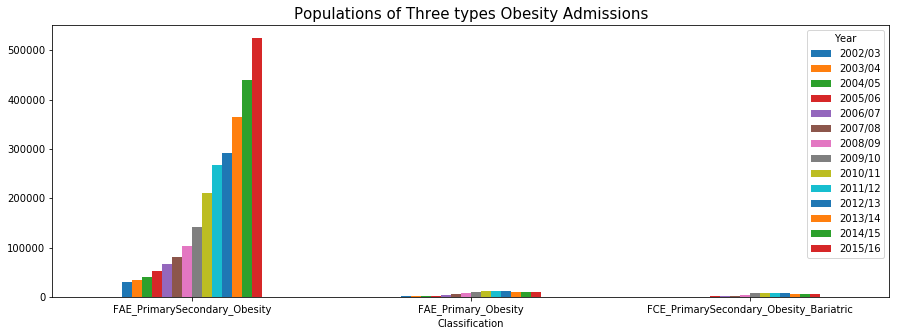

In [7]:
## 2.1: Plot the trend of three obesity admissions over the year for all age groups ##

import matplotlib.pyplot as plt
%matplotlib inline

# from df1_sp
df1_sp.plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=0) 
plt.title('Populations of Three types Obesity Admissions', fontsize=15)
plt.show()
#df1_sp.unstack('index').plot(kind='bar', figsize=(18, 7))

**Note: This graph suggests that we should plot three types of obesity admissions separately since the number of populations where obesity was a factor (FAE_PrimarySecondary_Obesity) are far larger than other types of obesity admissions. ** <br/>

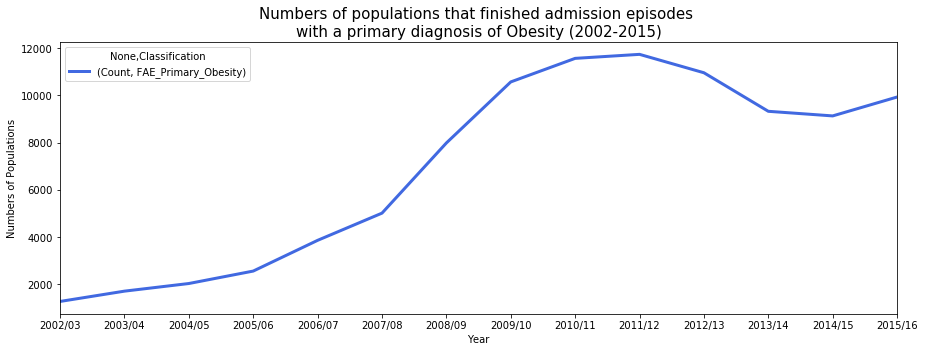

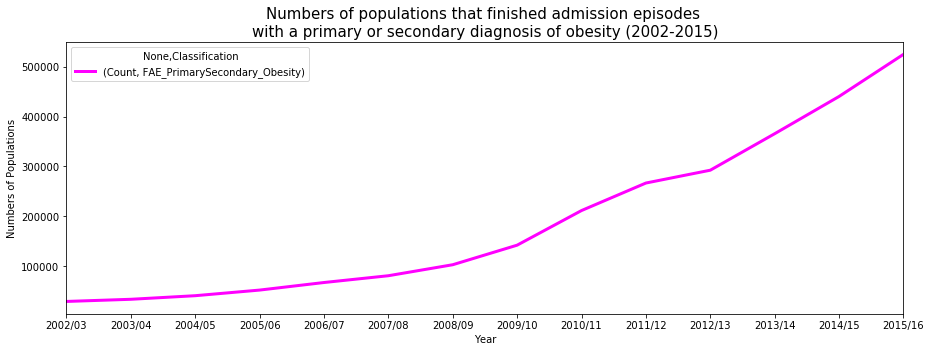

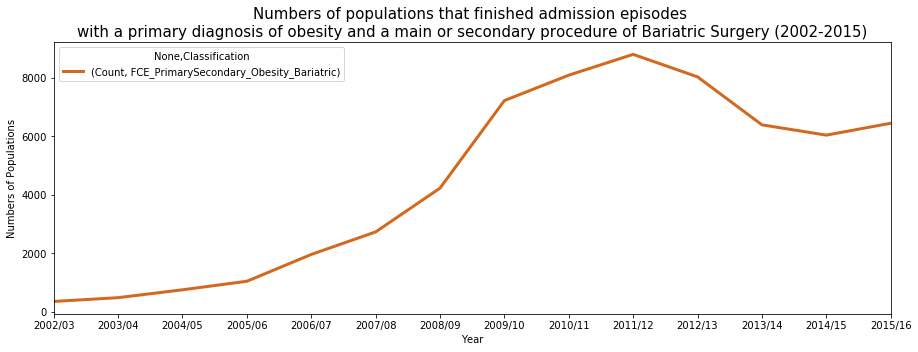

In [8]:
## 2.2: Plot the trend of three obesity admissions separately ##

# plot from df1_s and then pivot
df1_s[df1_s.Classification =='FAE_Primary_Obesity'].pivot_table(df1_s, index='Year', columns='Classification').plot(figsize=(15, 5), linewidth=3, color="royalblue")
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.title('Numbers of populations that finished admission episodes \nwith a primary diagnosis of Obesity (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations');

df1_s[df1_s.Classification =='FAE_PrimarySecondary_Obesity'].pivot_table(df1_s, index='Year', columns='Classification').plot(figsize=(15, 5), linewidth=3, color="magenta")
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.title('Numbers of populations that finished admission episodes \nwith a primary or secondary diagnosis of obesity (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations');

df1_s[df1_s.Classification =='FCE_PrimarySecondary_Obesity_Bariatric'].pivot_table(df1_s, index='Year', columns='Classification').plot(figsize=(15, 5), linewidth=3, color="chocolate")
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.title('Numbers of populations that finished admission episodes \nwith a primary diagnosis of obesity and a main or secondary procedure of Bariatric Surgery (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations');

########### Other Methods: bar plot ###########
#plt.figure()
#df1_sp_ps = df1_sp[df1_sp.index =='FAE_PrimarySecondary_Obesity']
#df1_sp_ps.plot(kind='bar', figsize=(10, 5))
#plt.title('FAE_PrimarySecondary_Obesity', fontsize=15)
#plt.xticks(rotation=0) 

#df1_sp_p = df1_sp[df1_sp.index =='FAE_Primary_Obesity']
#df1_sp_p.plot(kind='bar', figsize=(10, 5))
#plt.title('FAE_Primary_Obesity', fontsize=15)
#plt.xticks(rotation=0) 

#df1_sp_psb = df1_sp[df1_sp.index =='FCE_PrimarySecondary_Obesity_Bariatric']
#df1_sp_psb.plot(kind='bar', figsize=(10, 5))
#plt.title('FCE_PrimarySecondary_Obesity_Bariatric', fontsize=15)
#plt.xticks(rotation=0) 
#plt.show()
########### Other Methods: bar plot ###########


** Note: Overall, there is an increasing trend for each type of obesity admission even though there are some fluctuations within admissions directly attributed to obesity (FAE_Primary_Obesity) and admissions for bariatric surgery (FCE_PrimarySecondary_Obesity_Bariatric). **

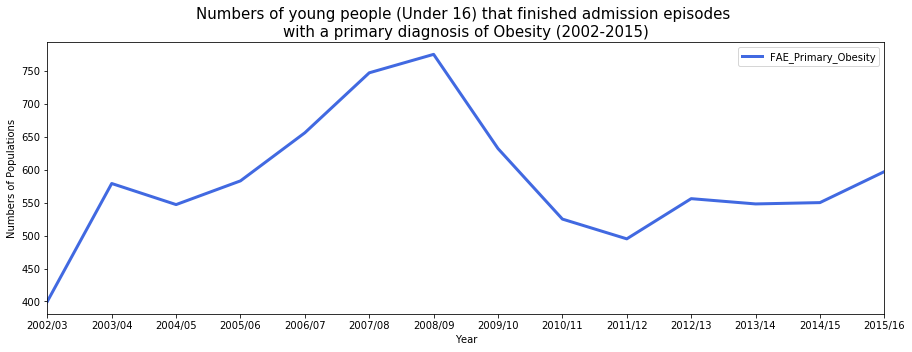

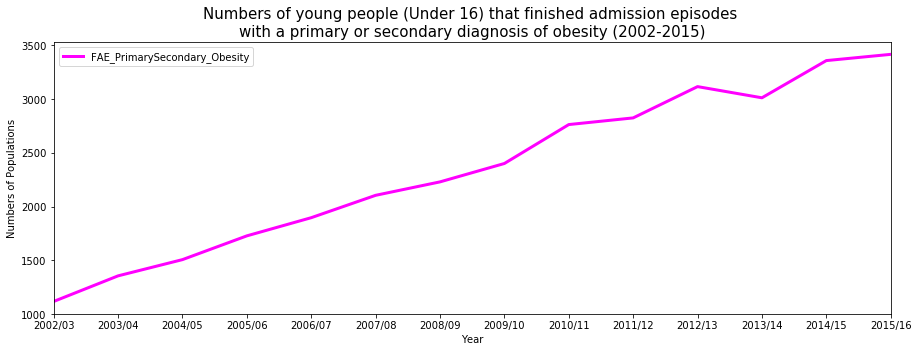

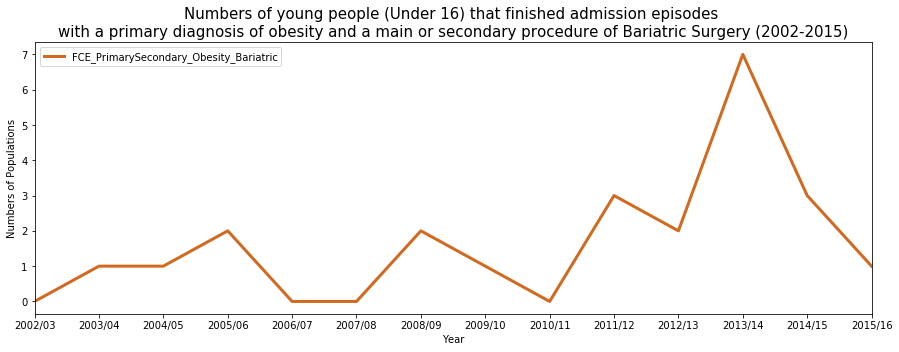

In [9]:
## 2.3: Plot the trend of three types obesity admissions separately for child/young people (ages under 16) ##

import matplotlib.pyplot as plt

# Extract AgeGroup from df1
df1_AG = df1[df1.Metric_Primary=='AgeGroup']
df1_AG = df1_AG.drop(['ONS_Code','Org_Code','Org_Name','Count'], axis=1)

# plot
df1_AG_CY = df1_AG[df1_AG.Metric_Secondary=='Under 16']
df1_AG_CY_p = df1_AG_CY[df1_AG_CY.Classification == 'FAE_Primary_Obesity']
df1_AG_CY_p = df1_AG_CY_p.drop(['Metric_Primary','Metric_Secondary'], axis=1)
df1_AG_CY_p.set_index('Year', inplace=True)
df1_AG_CY_p.groupby('Classification')['Value'].plot(legend=True,figsize=(15, 5), linewidth=3, color="royalblue")
plt.title('Numbers of young people (Under 16) that finished admission episodes \nwith a primary diagnosis of Obesity (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();

df1_AG_CY_ps = df1_AG_CY[df1_AG_CY.Classification == 'FAE_PrimarySecondary_Obesity']
df1_AG_CY_ps = df1_AG_CY_ps.drop(['Metric_Primary','Metric_Secondary'], axis=1)
df1_AG_CY_ps.set_index('Year', inplace=True)
df1_AG_CY_ps.groupby('Classification')['Value'].plot(legend=True,figsize=(15, 5), linewidth=3, color="magenta")
plt.title('Numbers of young people (Under 16) that finished admission episodes \nwith a primary or secondary diagnosis of obesity (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();

df1_AG_CY_psb = df1_AG_CY[df1_AG_CY.Classification == 'FCE_PrimarySecondary_Obesity_Bariatric']
df1_AG_CY_psb = df1_AG_CY_psb.drop(['Metric_Primary','Metric_Secondary'], axis=1)
df1_AG_CY_psb.set_index('Year', inplace=True)
df1_AG_CY_psb.groupby('Classification')['Value'].plot(legend=True,figsize=(15, 5), linewidth=3, color="chocolate")
plt.title('Numbers of young people (Under 16) that finished admission episodes \nwith a primary diagnosis of obesity and a main or secondary procedure of Bariatric Surgery (2002-2015)', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();

** Note: The main reason why I separate childhood obesity related admissions (under 16 years old) from all populations is that I would like to observe whether childhood obesity rate increases over the years or not.** <br/>

From above figures, there is a growing trend that young people are admitted to hospitals where obesity is a factor (FAE_PrimarySecondary_Obesity). Besides, hospital admission for young people caused by obesity directly (FAE_Primary_Obesity) reached its peak in 2008. Noticeably, young people are less likely to be admitted to hospitals because of bariatric surgery (FCE_PrimarySecondary_Obesity_Bariatric). From above figures, the number of hospital admission for bariatric surgery for young people is relatively low over the time, ranging from 0 to 7.

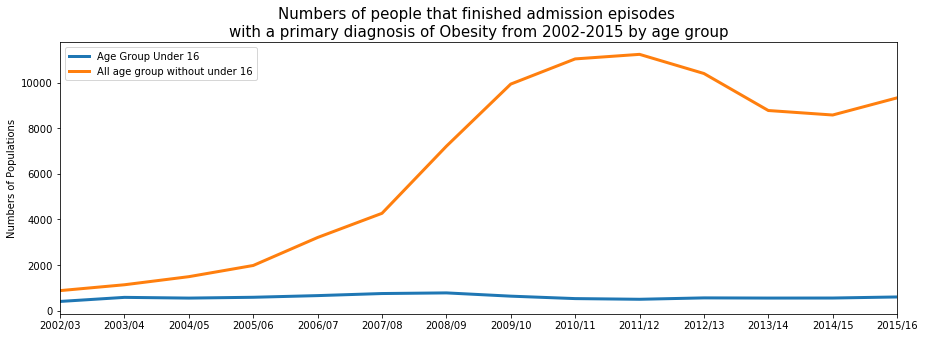

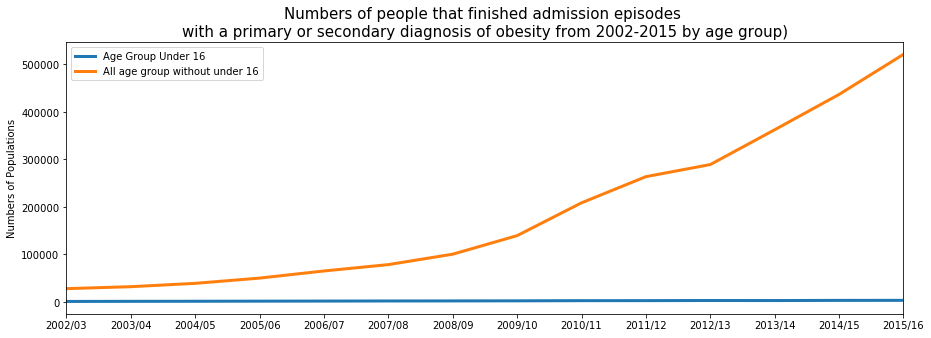

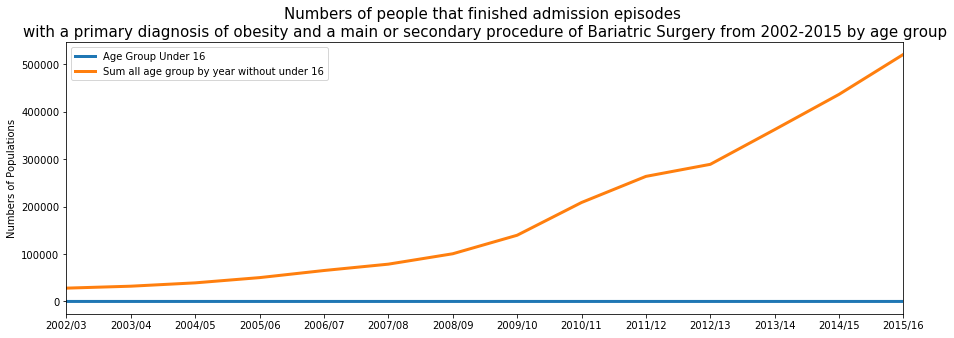

In [10]:
## 2.4: Compare the trend of hospital admissions for young people and adults (where AgeGroup!= Under 16) ##

# Under 16 for FAE_Primary_Obesity
df1_AG_CY = df1_AG[df1_AG.Metric_Secondary=='Under 16']
df1_AG_CY.columns = ['Year', 'Classification', 'Metric_Primary', 'Metric_Secondary','Age Group Under 16']
df1_AG_CY_p = df1_AG_CY[df1_AG_CY.Classification == 'FAE_Primary_Obesity']
df1_AG_CY_p = df1_AG_CY_p.drop(['Metric_Primary','Metric_Secondary'], axis=1)

# > 16 for FAE_Primary_Obesity
df1_AG_O = df1_AG[df1_AG.Metric_Secondary!='Under 16']
df1_AG_O_p = df1_AG_O[df1_AG_O.Classification == 'FAE_Primary_Obesity']
df1_AG_O_p_n = df1_AG_O_p.groupby('Year').agg({'Value': sum}).rename(columns={'Value': 'All age group without under 16'}).reset_index()

# plot two lines in a graph: one for under 16, and the other one for >16
df2m_p = pd.merge(df1_AG_CY_p, df1_AG_O_p_n , how='outer', on=['Year']) # merge count to df1
df2m_p.plot(legend=True,figsize=(15, 5), linewidth=3)
plt.title('Numbers of people that finished admission episodes \nwith a primary diagnosis of Obesity from 2002-2015 by age group', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();


# Under 16 for FAE_PrimarySecondary_Obesity
df1_AG_CY_ps = df1_AG_CY[df1_AG_CY.Classification == 'FAE_PrimarySecondary_Obesity']
df1_AG_CY_ps = df1_AG_CY_ps.drop(['Metric_Primary','Metric_Secondary'], axis=1)

# > 16 for FAE_PrimarySecondary_Obesity
df1_AG_O_ps = df1_AG_O[df1_AG_O.Classification == 'FAE_PrimarySecondary_Obesity']
df1_AG_O_ps_n = df1_AG_O_ps.groupby('Year').agg({'Value': sum}).rename(columns={'Value': 'All age group without under 16'}).reset_index()

# plot two lines in a graph: one for under 16, and the other one for >16
df2m_ps = pd.merge(df1_AG_CY_ps, df1_AG_O_ps_n , how='outer', on=['Year']) # merge count to df1
df2m_ps.plot(legend=True,figsize=(15, 5), linewidth=3)
plt.title('Numbers of people that finished admission episodes \nwith a primary or secondary diagnosis of obesity from 2002-2015 by age group)', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();


# Under 16 for FCE_PrimarySecondary_Obesity_Bariatric
df1_AG_CY_psb = df1_AG_CY[df1_AG_CY.Classification == 'FCE_PrimarySecondary_Obesity_Bariatric']
df1_AG_CY_psb = df1_AG_CY_psb.drop(['Metric_Primary','Metric_Secondary'], axis=1)

# > 16 for FCE_PrimarySecondary_Obesity_Bariatric
df1_AG_O_psb = df1_AG_O[df1_AG_O.Classification == 'FCE_PrimarySecondary_Obesity_Bariatric']
df1_AG_O_psb_n = df1_AG_O_ps.groupby('Year').agg({'Value': sum}).rename(columns={'Value': 'Sum all age group by year without under 16'}).reset_index()

# plot two lines in a graph: one for under 16, and the other one for >16
df2m_psb = pd.merge(df1_AG_CY_psb, df1_AG_O_psb_n , how='outer', on=['Year']) # merge count to df1
df2m_psb.plot(legend=True,figsize=(15, 5), linewidth=3)
plt.title('Numbers of people that finished admission episodes \nwith a primary diagnosis of obesity and a main or secondary procedure of Bariatric Surgery from 2002-2015 by age group', fontsize=15)
plt.ylabel('Numbers of Populations')
plt.xticks(range(14), ('2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09','2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16'))
plt.show();

** Note: By comparing age group under 16 and age group over 16 for three types of obesity admissions, we can discover that childhood obesity (age group under 16) rates were far lower than the adults (age group larger than 16), but childhood obesity where obesity is a factor (FAE_PrimarySecondary_Obesity) have indeed increased over the years which can be proved from the figures in 2.3. **

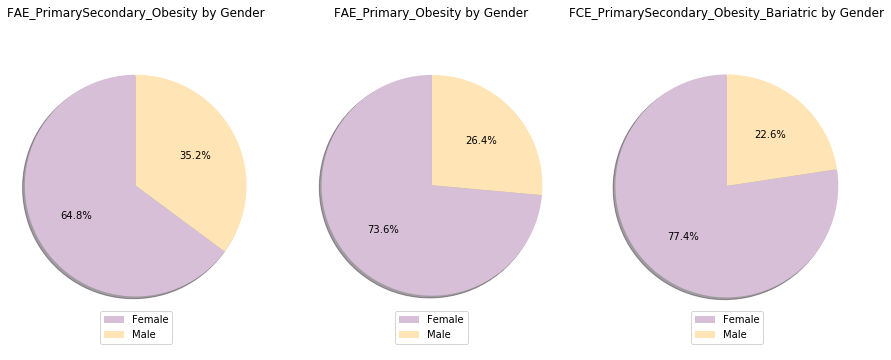

In [11]:
## 3: Plot pie charts of different genders for three types of obesity admissions (Only consider the average trend, instead of considering specific year) ##

# Preprocess data to plot pie chart
df1_g = df1[(df1.Metric_Primary=='Gender') & (df1.Metric_Secondary!='All persons')].drop(['ONS_Code','Org_Code','Org_Name','Metric_Primary','Count'], axis=1).reset_index(drop=True)
df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).mean().rename(columns={'Value': 'Count by different class and gender (average value)'}).reset_index()
#df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count by different class and gender'}).reset_index()
df1_g_c = df1_g_c.sort_values(by=['Classification'])
df1_g_c = df1_g_c.round(1)

# separate different class
df1_g_c_ps = df1_g_c[df1_g_c.Classification=='FAE_PrimarySecondary_Obesity']
df1_g_c_p = df1_g_c[df1_g_c.Classification=='FAE_Primary_Obesity']
df1_g_c_psb = df1_g_c[df1_g_c.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']


# Plot pie charts
plt.figure(figsize=(15,6))
colors = ['thistle', 'moccasin']

plt.subplot(131)
patches, texts, junk = plt.pie(df1_g_c_ps['Count by different class and gender (average value)'], 
                         colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_ps['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_PrimarySecondary_Obesity by Gender', fontsize=12)


plt.subplot(132)
patches, texts, junk = plt.pie(df1_g_c_p['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_p['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_Primary_Obesity by Gender', fontsize=12)


plt.subplot(133)
patches, texts, junk = plt.pie(df1_g_c_psb['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_psb['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FCE_PrimarySecondary_Obesity_Bariatric by Gender', fontsize=12)
plt.show();

** Note: From this graph, it shows that women have higer probability to be admitted to hospitals than men because of these three types of obesity admissions. As a result, we can infer that women are more likely to be obese than men. **

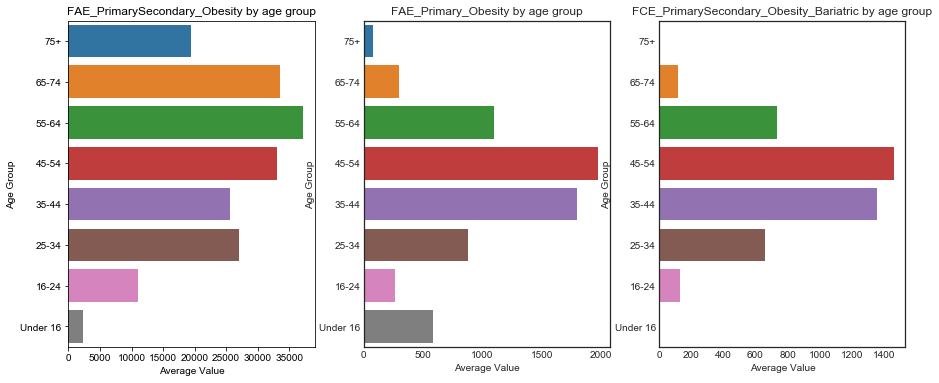

In [12]:
## 4: Plot the bar chart of different age groups for three different classes (Considering time average) ##

# Extract AgeGroup from df1 (do this step already)
#df1_AG = df1[df1.Metric_Primary=='AgeGroup']
#df1_AG = df1_AG.drop(['ONS_Code','Org_Code','Org_Name','Count'], axis=1)

# see the average trend for each age group of obesity related hospital admissions
df1_AG_s = df1_AG.groupby(['Classification', 'Metric_Secondary']).mean().rename(columns={'Value': 'Average Value for each age group'}).reset_index()
df1_AG_s = df1_AG_s.round(0) 

# separate different obesity related hospital admissions
df1_AG_sps = df1_AG_s[df1_AG_s.Classification=='FAE_PrimarySecondary_Obesity']  
df1_AG_sp = df1_AG_s[df1_AG_s.Classification=='FAE_Primary_Obesity']  
df1_AG_spsb = df1_AG_s[df1_AG_s.Classification=='FCE_PrimarySecondary_Obesity_Bariatric'] 

# plot
import seaborn as sns
#sns.set()

fig, ax = plt.subplots(figsize=(15, 6))

plt.subplot(131)
sns.set_style('white')
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sps,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FAE_PrimarySecondary_Obesity by age group')

plt.subplot(132)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sp,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FAE_Primary_Obesity by age group')

plt.subplot(133)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_spsb,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='FCE_PrimarySecondary_Obesity_Bariatric by age group')
plt.show();

** Note: 
For those whose age under 16, they are less likely to be admitted to hospitals because of bariatric surgeries, while they have a higer possibility to be admitted to hospitals directly because of obesity or obesity is a factor. For people who belongs to the age group between 36-54, they have the highest possibility to be admitted to hospitals because of these three types of obesity admissions. For the elderly (over 65), they also have higher probability to be admitted where obesity is a factor; however, they are less likely to be admitted to hospitals because of obesity as a main cause.**

#############################################################################################################

### Outline of how I process Dataset 2:
---

1. Identify the relation between df1 and df2. <br/>
The relationship between df1 and df2: df1 contains time series data for Org_Type=='Nationl' while df2 contains only 2015/16 data but include other Org_Type (i.e. CCG, CommissioningRegion, National and Region)
<br/><br/>

2. Change the format of 'Value' column in df2. <br/>
Before plotting, we need to deal with the missing values in df2. In df2 column 'Value', there are some value with * -> replace it with NA and drop it. Moreover, the format of Value include comma, to sum the value, we need to delete comma and change the type of that columns.
<br/><br/>

3. Plot to see whether different Org_Type have different value for each class
<br/><br/>

4. Compared the numbers of obesity related admissions by region (England)

In [13]:
## 1: Identified the relation between df1 and df2 ## 
# We can create Org_Type=='National' in df2 by df1
df1_p = df1[df1.Year=='2015/16']
df1_p = df1_p[df1_p.Metric_Primary=='Gender']
df1_p

Year   ONS_Code Org_Code Org_Name  \
437  2015/16  E92000001      ENG  England   
438  2015/16  E92000001      ENG  England   
439  2015/16  E92000001      ENG  England   
448  2015/16  E92000001      ENG  England   
449  2015/16  E92000001      ENG  England   
450  2015/16  E92000001      ENG  England   
459  2015/16  E92000001      ENG  England   
460  2015/16  E92000001      ENG  England   
461  2015/16  E92000001      ENG  England   

                             Classification Metric_Primary Metric_Secondary  \
437            FAE_PrimarySecondary_Obesity         Gender      All persons   
438            FAE_PrimarySecondary_Obesity         Gender             Male   
439            FAE_PrimarySecondary_Obesity         Gender           Female   
448                     FAE_Primary_Obesity         Gender      All persons   
449                     FAE_Primary_Obesity         Gender             Male   
450                     FAE_Primary_Obesity         Gender           Female   
459  FCE_PrimarySecondary_Obesity_Bariatric         Gender      All persons   
460  FCE_PrimarySecondary_Obesity_Bariatric         Gender             Male   
461  FCE_PrimarySecondary_Obesity_Bariatric         Gender           Female   

      Value   Count  
437  524725  524704  
438  175401  524704  
439  349279  524704  
448    9929    9929  
449    2573    9929  
450    7356    9929  
459    6438    6438  
460    1418    6438  
461    5020    6438

In [14]:
df2 = pd.read_csv('CCG_data_1516.csv', sep=',')
df2 = df2.sort_index(by=['Org_Name','Org_Type'])
df2 = df2.reset_index(drop=True)
df2[df2.Org_Type=='National']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


Year  Org_Type   ONS_Code Org_Code Org_Name  \
0  2015/16  National  E92000001      NaN  ENGLAND   
1  2015/16  National  E92000001      NaN  ENGLAND   
2  2015/16  National  E92000001      NaN  ENGLAND   
3  2015/16  National  E92000001      NaN  ENGLAND   
4  2015/16  National  E92000001      NaN  ENGLAND   
5  2015/16  National  E92000001      NaN  ENGLAND   
6  2015/16  National  E92000001      NaN  ENGLAND   
7  2015/16  National  E92000001      NaN  ENGLAND   
8  2015/16  National  E92000001      NaN  ENGLAND   

                           Classification Metric_Primary    Value  
0                     FAE_Primary_Obesity    All persons    9,929  
1                     FAE_Primary_Obesity           Male    2,573  
2                     FAE_Primary_Obesity         Female    7,356  
3            FAE_PrimarySecondary_Obesity    All persons  524,725  
4            FAE_PrimarySecondary_Obesity           Male  175,401  
5            FAE_PrimarySecondary_Obesity         Female  349,279  
6  FCE_PrimarySecondary_Obesity_Bariatric    All persons    6,438  
7  FCE_PrimarySecondary_Obesity_Bariatric           Male    1,418  
8  FCE_PrimarySecondary_Obesity_Bariatric         Female    5,020

** Note: From above, we could see there is some relationship between dataset1 and dataset2: df1 contains time series data for Org_Type=='Nationl' only while df2 contains only 2015/16 data but include other Org_Type (i.e. CCG, CommissioningRegion, National and Region) **

In [15]:
## 2: Change the format of 'Value' column in df2 ##

# have * in Value column -> replace * with NA in Value column and drop NA
df2['Revised_Value'] = df2.Value.replace('*', 'NA')
df2_r = df2[df2.Revised_Value!='NA']
df2_r = df2_r[df2_r.Metric_Primary=='All persons']
df2_r.head(3) # comma appears in Value

# deal with comma in value so that we can sum it
df2_r['Revised_Value'] = df2_r['Revised_Value'].str.replace(',','')
df2_r['Revised_Value'] = df2_r['Revised_Value'].astype(int)
print(df2_r.dtypes)
df2_r.head(3)

# drop orignial Value and replace it with Revised Value after that rename it 'Value'
df2_r = df2_r.drop(['Value'], axis=1)
df2_r.columns = ['Year', 'Org_Type', 'ONS_Code', 'Org_Code', 'Org_Name','Classification', 'Metric_Primary', 'Value'] # Rename Revised_Value with Value

Year              object
Org_Type          object
ONS_Code          object
Org_Code          object
Org_Name          object
Classification    object
Metric_Primary    object
Value             object
Revised_Value      int64
dtype: object


In [16]:
df2_r = df2_r.sort_index(by=['Org_Type','Classification'])
df2_a = df2_r.groupby(['Org_Type', 'Classification']).sum().rename(columns={'Value': 'Count'}).reset_index()

# prepare for plot
df2_a_p = df2_a.pivot(index='Classification', columns='Org_Type', values='Count')
df2_a_p

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


Org_Type                                   CCG  CommissioningRegion  National  \
Classification                                                                  
FAE_PrimarySecondary_Obesity            524598               524598    524725   
FAE_Primary_Obesity                       9887                 9929      9929   
FCE_PrimarySecondary_Obesity_Bariatric    6389                 6438      6438   

Org_Type                                Region  
Classification                                  
FAE_PrimarySecondary_Obesity            524598  
FAE_Primary_Obesity                       9929  
FCE_PrimarySecondary_Obesity_Bariatric    6438

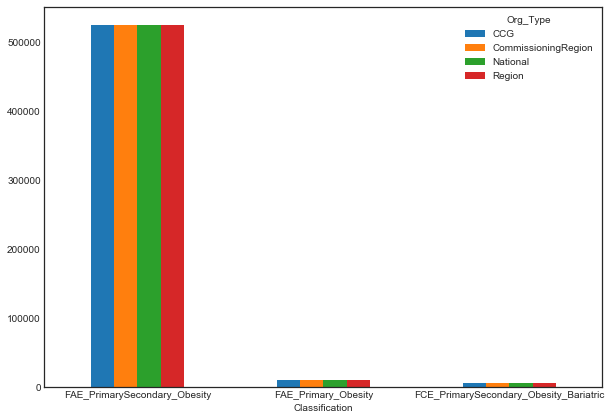

In [17]:
## 3: Plot to see whether different Org_Type have different value for each class ##
df2_a_p.plot(kind='bar', figsize=(10, 7))
plt.xticks(rotation=0) 
#plt.xlabel('Three Classes', fontsize=15)
#plt.title('Admission Populations by Class', fontsize=25)
plt.show()

** Note: Each Org_Type include almost the same number of samples for these three types of obesity admissions. **

In [18]:
## 4: Compared the numbers of obesity related admissions by region (England) ##

df2_r_r = df2_r[df2_r.Org_Type=='Region']
print(df2_r_r.Org_Name.unique())

# Divide the region into five parts according to NHS [https://www.england.nhs.uk/about/regional-area-teams/]
North = df2_r_r[df2_r_r['Org_Name'].str.contains('North')]
North = North[North.Org_Code!='Q76']
South_East = df2_r_r[df2_r_r['Org_Name'].str.contains('South East')]
South_West = df2_r_r[df2_r_r['Org_Name'].str.contains('South West')]
Midlands_East = df2_r_r[df2_r_r['Org_Name'].str.contains('Midlands and East')]
# Midlands and East regional team covers the West Midlands, North Midlands, Central Midlands and East
London = df2_r_r[df2_r_r['Org_Name'].str.contains('London')]

# sum each dataframe
London_s = London.groupby(['Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count_London (2015/16)'}).reset_index()
North_s = North.groupby(['Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count_North (2015/16)'}).reset_index()
South_East_s = South_East.groupby(['Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count_South_East (2015/16)'}).reset_index()
South_West_s = South_West.groupby(['Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count_South_West (2015/16)'}).reset_index()
Midlands_East_s = Midlands_East.groupby(['Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count_Midlands_East (2015/16)'}).reset_index()

# merge all in one dataframe
All = pd.merge(London_s, North_s , how='outer', on=['Classification']) 
All = pd.merge(All, South_East_s , how='outer', on=['Classification'])
All = pd.merge(All, South_West_s , how='outer', on=['Classification'])
All = pd.merge(All, Midlands_East_s , how='outer', on=['Classification'])
All

['NHS England London' 'NHS England Midlands and East (Central Midlands)'
 'NHS England Midlands and East (East)'
 'NHS England Midlands and East (North Midlands)'
 'NHS England Midlands and East (West Midlands)'
 'NHS England North (Cheshire and Merseyside)'
 'NHS England North (Cumbria and North East)'
 'NHS England North (Lancashire and Greater Manchester)'
 'NHS England North (Yorkshire and Humber)'
 'NHS England South (South Central)' 'NHS England South (South East)'
 'NHS England South (South West)' 'NHS England South (Wessex)']


Classification  Count_London (2015/16)  \
0            FAE_PrimarySecondary_Obesity                   53267   
1                     FAE_Primary_Obesity                    2127   
2  FCE_PrimarySecondary_Obesity_Bariatric                    1400   

   Count_North (2015/16)  Count_South_East (2015/16)  \
0                 157963                       33377   
1                   3148                         779   
2                   1679                         610   

   Count_South_West (2015/16)  Count_Midlands_East (2015/16)  
0                       44007                         177044  
1                         540                           2535  
2                         350                           1802

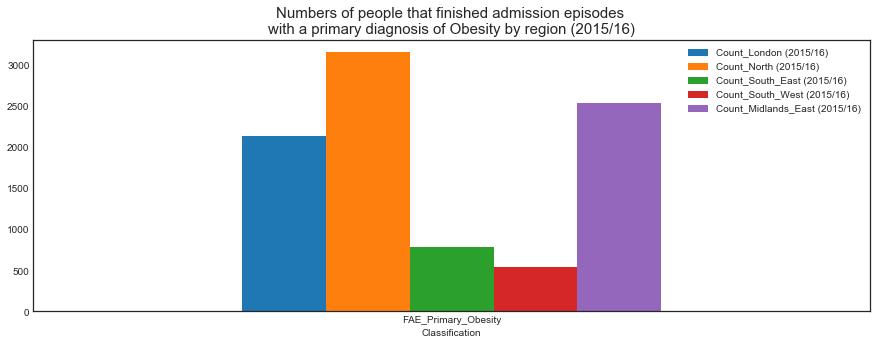

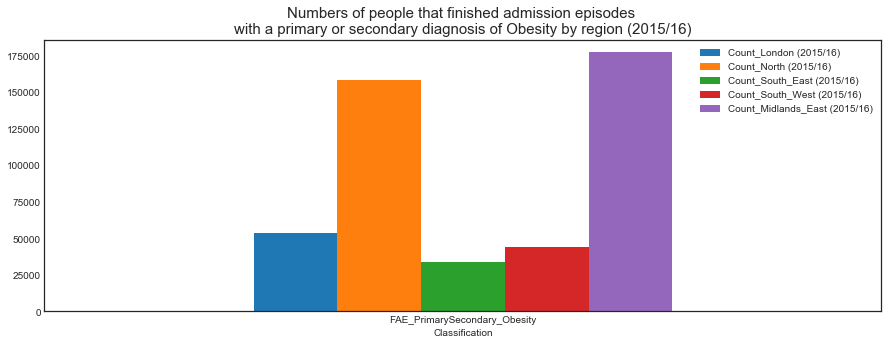

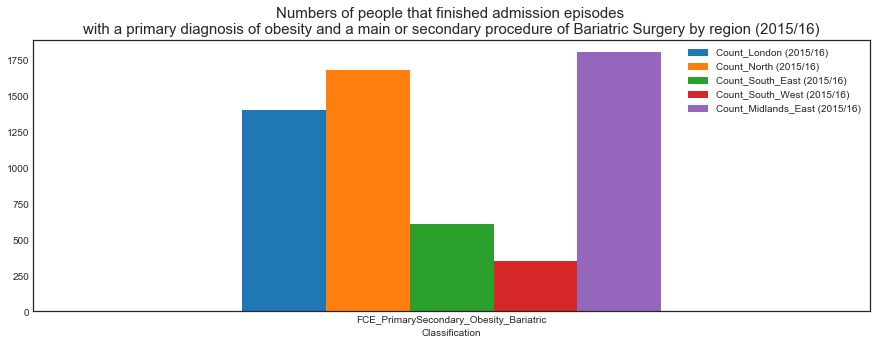

In [19]:
All_p =All[All.Classification=='FAE_Primary_Obesity']
All_ps =All[All.Classification=='FAE_PrimarySecondary_Obesity']
All_psb =All[All.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']

All_p.plot.bar(x='Classification', figsize=(15,5))
plt.xticks(rotation=0) 
plt.title('Numbers of people that finished admission episodes \nwith a primary diagnosis of Obesity by region (2015/16)', fontsize=15)
plt.show();

All_ps.plot.bar(x='Classification', figsize=(15,5))
plt.xticks(rotation=0) 
plt.title('Numbers of people that finished admission episodes \nwith a primary or secondary diagnosis of Obesity by region (2015/16)', fontsize=15)
plt.show();


All_psb.plot.bar(x='Classification', figsize=(15,5))
plt.xticks(rotation=0) 
plt.title('Numbers of people that finished admission episodes \nwith a primary diagnosis of obesity and a main or secondary procedure of Bariatric Surgery by region (2015/16)', fontsize=15)
plt.show();


** Note: 
North region has the largest numbers of people that finished admission episodes with a primary diagnosis of obesity, while Midlands and East has the largest numbers of people  that finished admission episodes with a primary or secondary diagnosis of obesity and bariatric surgery. Overall, South region has the lowest numbers for these three types of obesity related admissions.
**

#############################################################################################################

## Summary
---
From above results, we could find that the obesity trend in England is increasing which is similar to global obesity trends. Besides, within these three types of obesity admissions, a lot of people in England, specifically in Northern and Midlands and East region, are admitted to hospitals where obesity is a factor. <br/>

The growing populations suffering from obesity have laid a burden on UK government since NHS England said around £16 billion a year is spent on the direct medical costs of diabetes and conditions related to being overweight or obese. And this medical expenditures is even higher than spending on the police or fire service. Therefore, UK government should tackle this issue immediately.